In [6]:
library(dplyr)
library(tidyr)
library(tidyverse)
library(tidymodels)
library(repr)

Loading our tennis player data into R

In [7]:
url <- "https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"
download.file(url, "player_stats.csv")
tennis_data <- read_csv("player_stats.csv")

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [8]:
tennis_data_deleted <- tennis_data |> 
        rename(Current_Rank = "Current Rank",Best_rank ="Best Rank",Favorite_Surface="Favorite Surface",
               Turned_Pro="Turned Pro",Current_Elo_Rank="Current Elo Rank",Best_Elo_Rank="Best Elo Rank",
               Peak_Elo_Rating="Peak Elo Rating",Last_Appearance="Last Appearance",GOAT_Rank="GOAT Rank",
               Best_Season="Best Season") |>
        select(- c(...1,Wikipedia, Height, Masters, Birthplace, Residence, Weight, Coach,
                   Facebook,Twitter, Nicknames, "Davis Cups", Olympics, "Grand Slams",
                   "Web Site", "Team Cups", "Weeks at No. 1", "Tour Finals"))

In [9]:
Separated_Age_Age_When <- separate(tennis_data_deleted,Age,into= c("Age","Age_When"),sep= "\\(") |> 
        separate(Age_When,into= c("Age_When","blank"),sep= "\\)")|>select(-blank)
#Separated Age to Age and Age_When

In [10]:
Separated_Current_Rank_Points <-separate(Separated_Age_Age_When,Current_Rank,into= c("Current_Rank","Current_Rank_Points"),sep= "\\(") |>
        separate(Current_Rank_Points,into= c("Current_Rank_Points","blank"),sep= "\\)")|>
        select(-blank)
#Separated Current_Rank to Current_Rank and Current_Rank_Points

In [11]:
Best_rank_When <-separate(Separated_Current_Rank_Points,Best_rank,into= c("Best_rank","Best_rank_When"),sep= "\\(" ) |>
        separate(Best_rank_When,into= c("Best_rank_When","blank"),sep= "\\)") |>
        select(-blank)

In [12]:
Seperated_Current_Elo_Rank <-separate(Best_rank_When,Current_Elo_Rank,into= c("Current_Elo_Rank","Current_Elo_Rank_Points"),sep= "\\(" ) |>
        separate(Current_Elo_Rank_Points,into= c("Current_Elo_Rank_Points","blank"),sep= "\\)")|>
        select(-blank)

In [13]:
Seperated_Best_Elo_Rank <-separate(Seperated_Current_Elo_Rank,Best_Elo_Rank,into= c("Best_Elo_Rank","Best_Elo_Rank_Date"),sep= "\\(" ) |>
        separate(Best_Elo_Rank_Date,into= c("Best_Elo_Rank_Date","blank"),sep= "\\)") |>
        select(-blank)


In [14]:
Separated_Peak_Elo_Rating<-separate(Seperated_Best_Elo_Rank,Peak_Elo_Rating	,into= c("Peak_Elo_Rating","Peak_Elo_Rating_Date"),sep= "\\(" ) |>
        separate(Peak_Elo_Rating_Date,into= c("Peak_Elo_Rating_Date","blank"),sep= "\\)")|>
        select(-blank)

In [15]:
Seperated_GOAT_Rank <-separate(Separated_Peak_Elo_Rating,GOAT_Rank,into= c("GOAT_Rank_Points","GOAT_Rank"),sep= "\\(" ) |>
        separate(GOAT_Rank,into= c("GOAT_Rank","blank"),sep= "\\)") |>
        select(-blank)

In [16]:
#lacking the Surface Data to do

In [17]:
tennis_data_remain <- select(Seperated_GOAT_Rank,c(Age, Country, Current_Rank, Current_Rank_Points, Best_rank, Best_rank_When,Name))|>
    mutate(Age=as.numeric(Age),Current_Rank=as.numeric(Current_Rank),Current_Rank_Points=as.numeric(Current_Rank_Points),Best_rank=as.numeric(Best_rank)) |>
    drop_na(Current_Rank_Points)


In [18]:
tennis_data_sorted <- arrange(tennis_data_remain,desc(as.numeric(Current_Rank_Points)))
tennis_data_sorted

Age,Country,Current_Rank,Current_Rank_Points,Best_rank,Best_rank_When,Name
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
33,Spain,1,10235,1,18-08-2008,Rafael Nadal
32,Serbia,2,9720,1,04-07-2011,Novak Djokovic
38,Switzerland,3,6590,1,02-02-2004,Roger Federer
23,Russian Federation,4,5960,4,09-09-2019,Daniil Medvedev
26,Austria,5,5890,4,06-11-2017,Dominic Thiem
21,Greece,6,5375,5,05-08-2019,Stefanos Tsitsipas
22,Germany,7,3345,3,06-11-2017,Alexander Zverev
23,Italy,8,2870,8,04-11-2019,Matteo Berrettini
31,Spain,9,2630,9,04-11-2019,Roberto Bautista Agut


In [19]:
tennis_split <- initial_split(tennis_data_sorted, prop = 0.75, strata = Country)
tennis_train <- training(tennis_split)
tennis_test <- testing(tennis_split)

Warning message:
“Too little data to stratify.
• Resampling will be unstratified.”


Here we are trying to look at the top 10 countries with the most players within the original data set as we are looking at which country produces the **MOST** talent. This will ignore countries with sole players as their only talent, as we would like to look at the likelihood of which countries produce talented players. By looking at the subsets of data with this finding, we can make some earlier predictions and expectations.

In [59]:
tennis_data_region <- tennis_data_sorted |>
    group_by(Country) |>
    summarize(count = n()) |> 
    arrange(desc(count)) |>
    slice(1:10) 
tennis_data_region

Country,count
<chr>,<int>
France,46
United States,39
Italy,37
Spain,34
Germany,29
Argentina,28
Australia,23
Russian Federation,20
Japan,19


In [21]:
#Finding the total points from each country
total_japan <- tennis_train |>
    filter(Country == "Japan") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1) 

total_france <- tennis_train |>
    filter(Country == "France") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_united_states <- tennis_train |>
    filter(Country == "United States") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_italy <- tennis_train |>
    filter(Country == "Italy") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_germany <- tennis_train |>
    filter(Country == "Germany") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_spain <- tennis_train |>
    filter(Country == "Spain") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_australia <- tennis_train |>
    filter(Country == "Australia") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_argentina <- tennis_train |>
    filter(Country == "Argentina") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_russian_federation <- tennis_train |>
    filter(Country == "Russian Federation") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

total_brazil <- tennis_train |>
     filter(Country == "Brazil") |>
    mutate(Country_Points = sum(Current_Rank_Points)) |>
    select(Country, Country_Points) |>
    slice(1)

In [58]:
total_country_points <- rbind(total_france, total_united_states,
                              total_italy, total_spain,
                              total_germany, total_argentina,
                              total_australia, total_russian_federation, 
                              total_japan, total_brazil)

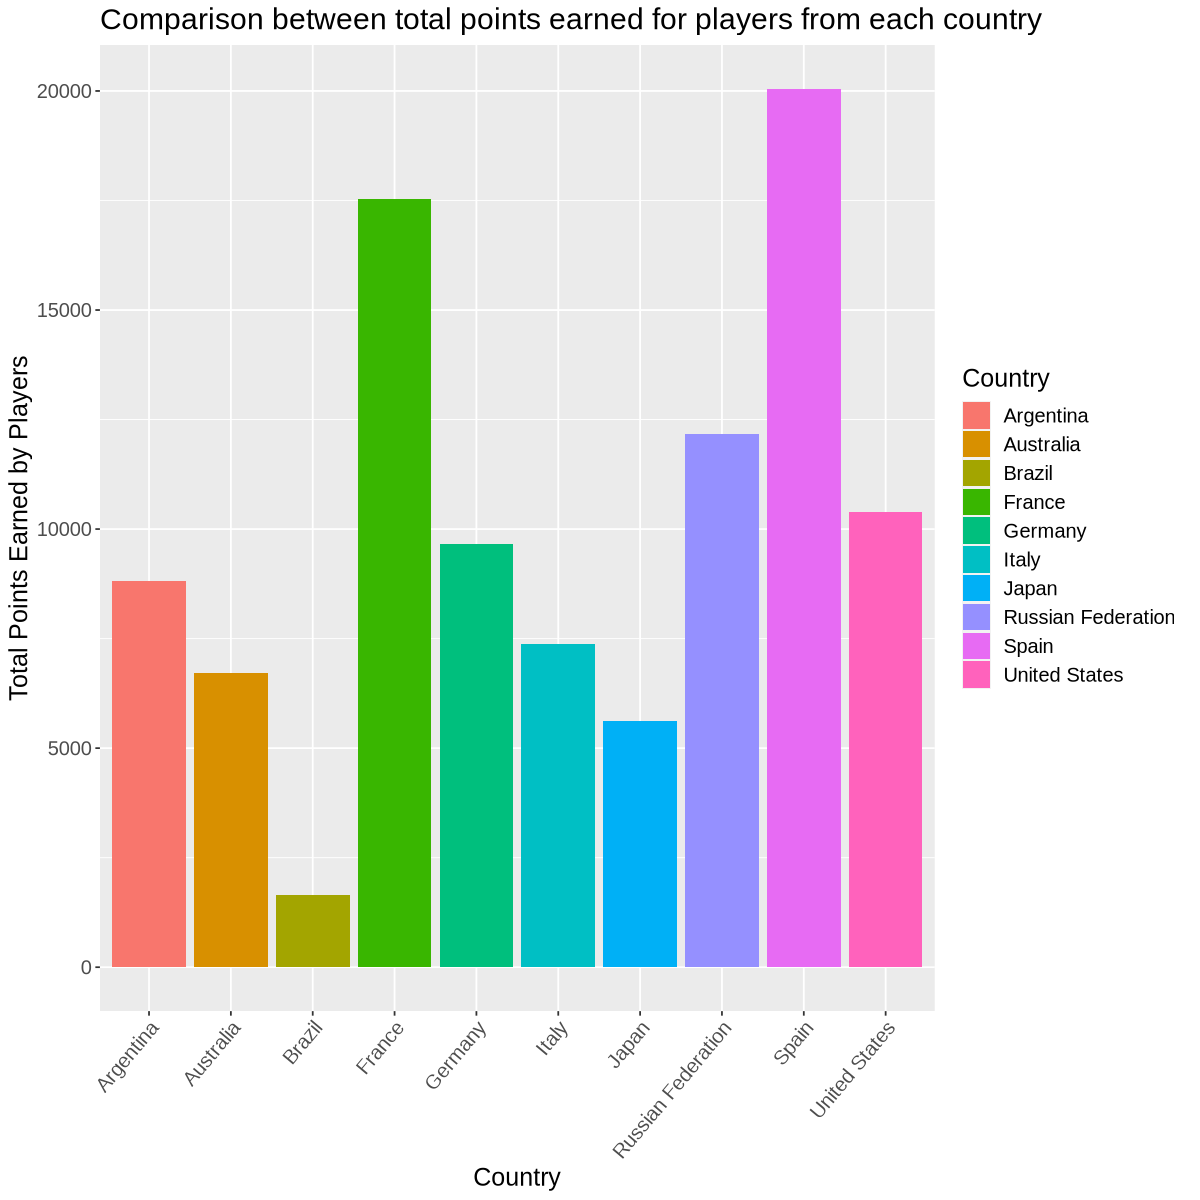

In [23]:
options(repr.plot.width = 10, repr.plot.height = 10)
country_vs_points <- total_country_points |>
                    ggplot(aes(x = Country, y = Country_Points)) +
                    geom_bar(stat="identity", aes(fill=Country)) +
                    labs(x = "Country", y = "Total Points Earned by Players") +
                    ggtitle("Comparison between total points earned for players from each country") +
                    theme(text = element_text(size = 15)) +
                    theme(axis.text.x = element_text(angle = 50, hjust = 1))
country_vs_points

The plot above shows us the comparison of all the points accumulated by all the players from each country. 

In [57]:
training_data_region <- tennis_train |>
    group_by(Country) |>
    summarize(count = n()) |> 
    filter(Country %in% c("France",
                       "United States",
                       "Italy",
                       "Spain",
                       "Germany",
                       "Argentina",
                       "Australia",
                       "Russian Federation",
                       "Japan",
                       "Brazil"))
country_players_points <- merge(training_data_region, total_country_points, by = 'Country') |>
                        arrange(desc(Country_Points))

In [60]:
country_avg_points <- country_players_points |>
    rowwise() |>
    mutate(avg = Country_Points / count)

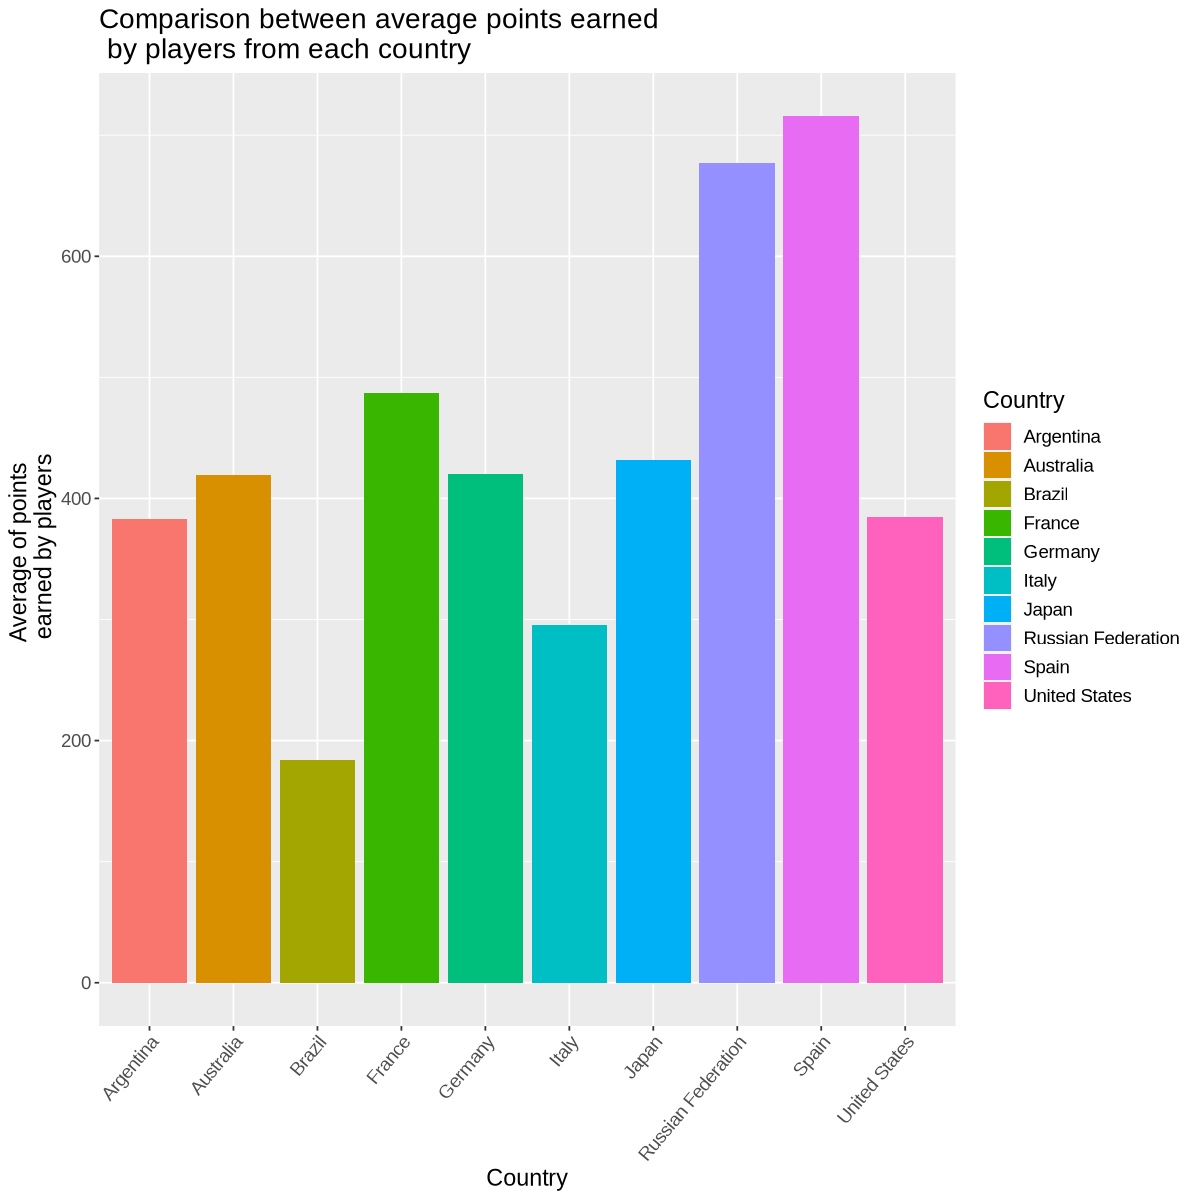

In [55]:
options(repr.plot.width = 10, repr.plot.height = 10)
avg_points_plot <- country_avg_points |>
                    ggplot(aes(x = Country, y = avg)) +
                    geom_bar(stat="identity", aes(fill=Country)) +
                    labs(x = "Country", y = "Average of points \n earned by players") +
                    ggtitle("Comparison between average points earned \n by players from each country") +
                    theme(text = element_text(size = 14)) +
                    theme(axis.text.x = element_text(angle = 50, hjust = 1))
avg_points_plot

With the plot above we can see the average contribution of points by players from each country.